In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

raw_data = pd.read_csv('E:/Santander/train_ver2.csv')

E:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
columns_names=raw_data.columns.tolist()
print("Columns names:")
print(columns_names)




Columns names:
['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo', 'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel', 'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext', 'conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov', 'nomprov', 'ind_actividad_cliente', 'renta', 'segmento', 'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1', 'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1']


In [3]:
raw_data.columns = ['Data_Collection_Date', 'Customer_Code', 'Employee Index', 'Cust_Country', 'Sex', 'Age',
              'Date_First_Contracted', 'New_Cust_Index', 'Cust_Seniority', 'Primary/Non-Primary(End_of_month)',
              'Last_date_Primary', 'Cust_Type', 'Cust_Relation_Type', 'Residence_Index', 'Foreigner_Index',
             'Spouse_Index', 'Channel_Used', 'Deceased_Index', 'Address Type', 'Province_Code', 'Province_Name',
             'Activity_Index', 'Gross_Household_Income', 'VIP_Status', 'Savings_Account', 'Guarantees',
             'Current_Accounts', 'Derivada_Account', 'Payroll_Account', 'Junior_Account', 'Mas_Particular_Account',
             'Particular_Account', 'Particular_Plus_Account', 'Short-term_Deposits', 'Medium-term_Deposits',
             'Long-term_Deposits', 'e-account', 'Funds', 'Mortgage', 'Pensions_Plan', 'Loans', 'Taxes', 'Credit_Card',
             'Securities', 'Home_Account', 'Payroll', 'Pensions', 'Direct_Debit']

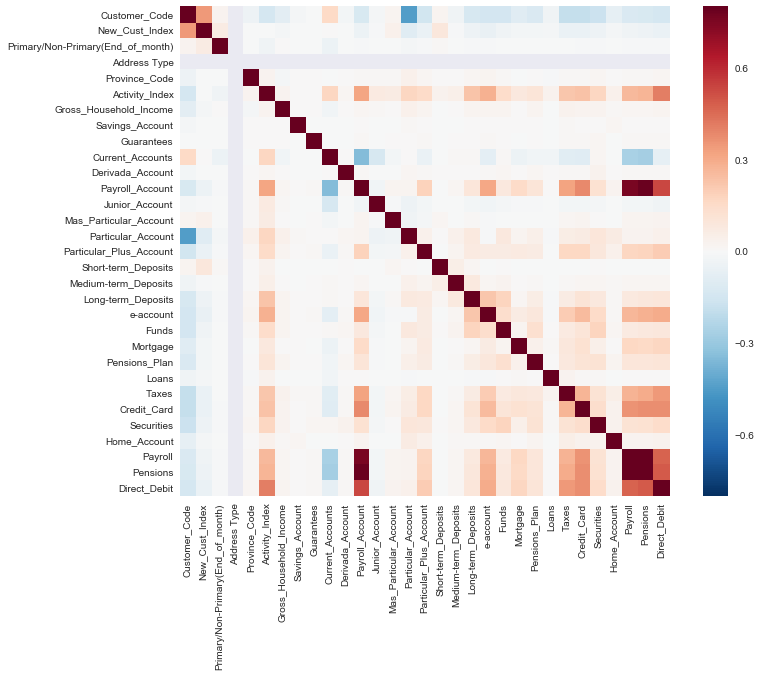

In [4]:
corrmat = raw_data.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [5]:
features = pd.get_dummies(raw_data['Savings_Account'])

In [6]:
means = raw_data[['Payroll','Pensions','Direct_Debit']].mean(axis=0)
stds = raw_data[['Payroll','Pensions','Direct_Debit']].std(axis=0)
features['pay_pens_ddebit'] = ((raw_data[['Payroll','Pensions','Direct_Debit']] - means) / stds).mean(axis=1)

In [28]:
plot_ppd = raw_data.loc[:, ['Payroll','Pensions','Direct_Debit']]
plot_ppd['pay_pens_ddebit'] = features['pay_pens_ddebit']
corrmat_ppd = plot_ppd.corr()

print(corrmat_ppd)

                  Payroll  Pensions  Direct_Debit  pay_pens_ddebit
Payroll          1.000000  0.957215      0.471138         0.928566
Pensions         0.957215  1.000000      0.490888         0.936121
Direct_Debit     0.471138  0.490888      1.000000         0.750426
pay_pens_ddebit  0.928566  0.936121      0.750426         1.000000


In [7]:
raw_data[raw_data.index.duplicated()]

,Data_Collection_Date,Customer_Code,Employee Index,Cust_Country,Sex,Age,Date_First_Contracted,New_Cust_Index,Cust_Seniority,Primary/Non-Primary(End_of_month),...,Mortgage,Pensions_Plan,Loans,Taxes,Credit_Card,Securities,Home_Account,Payroll,Pensions,Direct_Debit


In [8]:
df2 = raw_data.select_dtypes(['number'])

In [9]:
df2

,Customer_Code,New_Cust_Index,Primary/Non-Primary(End_of_month),Address Type,Province_Code,Activity_Index,Gross_Household_Income,Savings_Account,Guarantees,Current_Accounts,...,Mortgage,Pensions_Plan,Loans,Taxes,Credit_Card,Securities,Home_Account,Payroll,Pensions,Direct_Debit
0,1375586,0.0,1.0,1.0,29.0,1.0,87218.10,0,0,1,...,0,0,0,0,0,0,0,0.0,0.0,0
1,1050611,0.0,1.0,1.0,13.0,0.0,35548.74,0,0,1,...,0,0,0,0,0,0,0,0.0,0.0,0
2,1050612,0.0,1.0,1.0,13.0,0.0,122179.11,0,0,1,...,0,0,0,0,0,0,0,0.0,0.0,0
3,1050613,0.0,1.0,1.0,50.0,0.0,119775.54,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,1050614,0.0,1.0,1.0,50.0,1.0,NaN,0,0,1,...,0,0,0,0,0,0,0,0.0,0.0,0
5,1050615,0.0,1.0,1.0,45.0,0.0,22220.04,0,0,1,...,0,0,0,0,0,0,0,0.0,0.0,0
6,1050616,0.0,1.0,1.0,24.0,0.0,295590.36,0,0,1,...,0,0,0,0,0,0,0,0.0,0.0,0
7,1050617,0.0,1.0,1.0,50.0,1.0,113316.66,0,0,1,...,0,0,0,0,0,0,0,0.0,0.0,0
8,1050619,0.0,1.0,1.0,20.0,0.0,NaN,0,0,1,...,0,0,0,0,0,0,0,0.0,0.0,0
9,1050620,0.0,1.0,1.0,10.0,0.0,113194.98,0,0,1,...,0,0,0,0,0,0,0,0.0,0.0,0


In [10]:
df2['Gross_Household_Income'].replace(np.nan, df2['Gross_Household_Income'].mean(), inplace=True)

E:\Anaconda\lib\site-packages\pandas\core\generic.py:3554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [11]:
df2['Gross_Household_Income'] = df2['Gross_Household_Income'].replace(np.nan, df2['Gross_Household_Income'].mean())

E:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


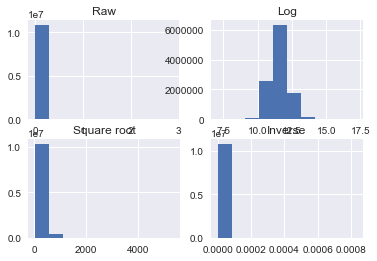

In [12]:
## Making a four-panel plot.
fig = plt.figure()

fig.add_subplot(221)
plt.hist(raw_data['Gross_Household_Income'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(raw_data['Gross_Household_Income'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(raw_data['Gross_Household_Income'].dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/raw_data['Gross_Household_Income'].dropna())
plt.title('Inverse')
plt.show()


In [13]:
df2.isnull().values.any()

True

In [14]:
inds = pd.isnull(df2).any(1).nonzero()[0]

In [15]:
inds

array([     261,     1029,     1063, ..., 13645938, 13646171, 13647040], dtype=int64)

In [16]:
df2

,Customer_Code,New_Cust_Index,Primary/Non-Primary(End_of_month),Address Type,Province_Code,Activity_Index,Gross_Household_Income,Savings_Account,Guarantees,Current_Accounts,...,Mortgage,Pensions_Plan,Loans,Taxes,Credit_Card,Securities,Home_Account,Payroll,Pensions,Direct_Debit
0,1375586,0.0,1.0,1.0,29.0,1.0,87218.100000,0,0,1,...,0,0,0,0,0,0,0,0.0,0.0,0
1,1050611,0.0,1.0,1.0,13.0,0.0,35548.740000,0,0,1,...,0,0,0,0,0,0,0,0.0,0.0,0
2,1050612,0.0,1.0,1.0,13.0,0.0,122179.110000,0,0,1,...,0,0,0,0,0,0,0,0.0,0.0,0
3,1050613,0.0,1.0,1.0,50.0,0.0,119775.540000,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,1050614,0.0,1.0,1.0,50.0,1.0,134254.318238,0,0,1,...,0,0,0,0,0,0,0,0.0,0.0,0
5,1050615,0.0,1.0,1.0,45.0,0.0,22220.040000,0,0,1,...,0,0,0,0,0,0,0,0.0,0.0,0
6,1050616,0.0,1.0,1.0,24.0,0.0,295590.360000,0,0,1,...,0,0,0,0,0,0,0,0.0,0.0,0
7,1050617,0.0,1.0,1.0,50.0,1.0,113316.660000,0,0,1,...,0,0,0,0,0,0,0,0.0,0.0,0
8,1050619,0.0,1.0,1.0,20.0,0.0,134254.318238,0,0,1,...,0,0,0,0,0,0,0,0.0,0.0,0
9,1050620,0.0,1.0,1.0,10.0,0.0,113194.980000,0,0,1,...,0,0,0,0,0,0,0,0.0,0.0,0


In [17]:
df2 = df2.loc[:, (df2 != 0).any(axis=0)]

In [18]:
df2.dropna(axis=0, inplace=True)

In [19]:
df2

,Customer_Code,New_Cust_Index,Primary/Non-Primary(End_of_month),Address Type,Province_Code,Activity_Index,Gross_Household_Income,Savings_Account,Guarantees,Current_Accounts,...,Mortgage,Pensions_Plan,Loans,Taxes,Credit_Card,Securities,Home_Account,Payroll,Pensions,Direct_Debit
0,1375586,0.0,1.0,1.0,29.0,1.0,87218.100000,0,0,1,...,0,0,0,0,0,0,0,0.0,0.0,0
1,1050611,0.0,1.0,1.0,13.0,0.0,35548.740000,0,0,1,...,0,0,0,0,0,0,0,0.0,0.0,0
2,1050612,0.0,1.0,1.0,13.0,0.0,122179.110000,0,0,1,...,0,0,0,0,0,0,0,0.0,0.0,0
3,1050613,0.0,1.0,1.0,50.0,0.0,119775.540000,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,1050614,0.0,1.0,1.0,50.0,1.0,134254.318238,0,0,1,...,0,0,0,0,0,0,0,0.0,0.0,0
5,1050615,0.0,1.0,1.0,45.0,0.0,22220.040000,0,0,1,...,0,0,0,0,0,0,0,0.0,0.0,0
6,1050616,0.0,1.0,1.0,24.0,0.0,295590.360000,0,0,1,...,0,0,0,0,0,0,0,0.0,0.0,0
7,1050617,0.0,1.0,1.0,50.0,1.0,113316.660000,0,0,1,...,0,0,0,0,0,0,0,0.0,0.0,0
8,1050619,0.0,1.0,1.0,20.0,0.0,134254.318238,0,0,1,...,0,0,0,0,0,0,0,0.0,0.0,0
9,1050620,0.0,1.0,1.0,10.0,0.0,113194.980000,0,0,1,...,0,0,0,0,0,0,0,0.0,0.0,0


In [20]:
from sklearn.preprocessing import StandardScaler
df2 = StandardScaler().fit_transform(df2)

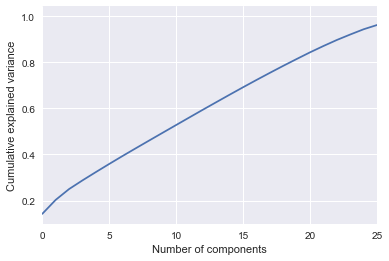

In [21]:
from sklearn.decomposition import PCA

pca = PCA().fit(df2)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,25,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [22]:
Xt = df2.T
Cx = np.cov(Xt)

print('Covariance Matrix:\n', Cx)

Covariance Matrix:
 [[  1.00000007e+00   3.47391318e-01   2.85790551e-02   0.00000000e+00
   -4.08228666e-02  -1.40124572e-01  -7.34918303e-02  -1.31204482e-02
   -5.49242780e-03   1.62532290e-01  -1.88498641e-02  -1.31194930e-01
   -1.68309520e-02   2.31907920e-02  -4.47636802e-01  -1.57105321e-01
    1.99946120e-02  -3.53626320e-02  -1.36244031e-01  -1.47382209e-01
   -1.44624489e-01  -9.72982983e-02  -1.19817162e-01  -3.58887850e-02
   -1.89531194e-01  -1.89188765e-01  -1.74407601e-01  -7.45262036e-02
   -1.20375277e-01  -1.32237362e-01  -1.44545365e-01]
 [  3.47391318e-01   1.00000007e+00   6.30405533e-02   0.00000000e+00
   -4.38012555e-03  -4.02825930e-03  -8.65469718e-03  -2.56042246e-03
   -9.86218809e-04   3.12303578e-03  -4.60849172e-03  -4.73037456e-02
   -1.13387314e-02   4.12529370e-02  -9.69418419e-02  -5.37222028e-02
    8.79055965e-02  -1.00243853e-02  -3.96668055e-02  -5.99283651e-02
   -3.27417472e-02  -1.93859969e-02  -2.33150907e-02  -1.26307555e-02
   -5.52345952e-

In [23]:
# Calculating eigenvalues and eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 31).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[[ 0.17051142]
 [ 0.06280555]
 [ 0.01182565]
 [ 0.        ]
 [-0.01585333]
 [-0.24347866]
 [-0.02509733]
 [-0.00375822]
 [-0.00988947]
 [ 0.13484362]
 [-0.01161523]
 [-0.40080589]
 [ 0.0110243 ]
 [-0.0155547 ]
 [-0.07615411]
 [-0.15688421]
 [ 0.00045313]
 [-0.02275912]
 [-0.1144205 ]
 [-0.23299152]
 [-0.10653625]
 [-0.12057767]
 [-0.10318099]
 [-0.01122654]
 [-0.24106045]
 [-0.27765073]
 [-0.13459578]
 [-0.03638178]
 [-0.3966653 ]
 [-0.40692261]
 [-0.33867703]]
Eigenvalue 1: 4.268646684045622
----------------------------------------
Eigenvector 2: 
[[ 0.45554102]
 [ 0.27369441]
 [ 0.06445997]
 [ 0.        ]
 [-0.05515677]
 [-0.19771424]
 [-0.08251629]
 [-0.02077438]
 [-0.00293031]
 [-0.20818184]
 [-0.03973298]
 [ 0.22687433]
 [ 0.02164318]
 [ 0.05784404]
 [-0.4198707 ]
 [-0.09488651]
 [ 0.02146915]
 [-0.08954809]
 [-0.24746216]
 [-0.08507158]
 [-0.26652484]
 [ 0.01739159]
 [-0.14688221]
 [-0.01945035]
 [-0.05184414]
 [-0.02708475]
 [-0.24230239]
 [-0.09404551]
 [ 0.2633

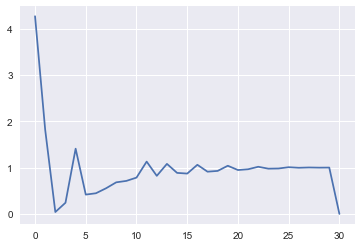

In [24]:
plt.plot(eig_val_cov)
plt.show()

In [25]:
# Create P, which we will use to transform Cx into Cy to get Y, the
# dimensionally-reduced representation of X.
P = eig_vec_cov[:, 0]

# Transform X into Y.
Y = P.T.dot(Xt)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [ 0.14228821  0.06056006  0.04695549  0.03766233  0.03601932  0.03535625
  0.03467454  0.03394261  0.03362721  0.0334267   0.03335849  0.03330043
  0.0332137   0.03270007  0.03256707  0.03214711  0.03159305  0.03095258
  0.03040177  0.02953513  0.02903847  0.02740368  0.0261324   0.02376106
  0.02273607]


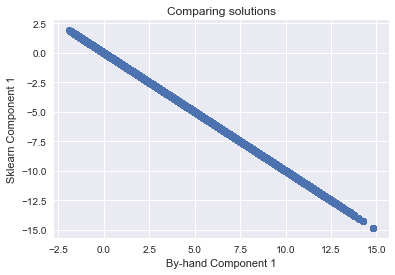

In [26]:
sklearn_pca = PCA(n_components=25)
Y_sklearn = sklearn_pca.fit_transform(df2)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

# Compare the sklearn solution to ours – a perfect match.
plt.plot(Y_sklearn[:, 0], Y, 'o')
plt.title('Comparing solutions')
plt.ylabel('Sklearn Component 1')
plt.xlabel('By-hand Component 1')
plt.show()